# 결정(Decision Tree) 알고리즘
- 결정 트리 or 의사결정트리
  - 일련의 규칙을 통해 데이터를 분류, 회귀하는 지도 학습 모델 중 하나
  - 결과 모델이 tree구조를 가지고 있기 때문에 DECISION TREE라고 함
  - 목표 : 데이터 특징으로부터 추론한 간단한 결정 규칙으로 학습하여 타켓 값(결과)을 예측하는 모델을 생성하는 것


  - 뿌리 : root : 맨위
  - 잎싹 : leaf (맨끝에 있는 단말노드, 엣지노드라고도 부른다. 결정값이다.)
  - 깊이 : depth (깊이가 길수록 의사결정이 복잡해지고 계산이 복잡해짐, 깊이를 결정하는게 하나의 파라미터)


---


비 순환 그래프의 형태
- 맨 위 노드를 root node
- 엣지 노드 = 터미널 = 리프노드 : 맨 아래 노드



---
결정 트리 알고리즘들
- 가장 기본이 되는 알고리즘
  - 불순도를 수치한 값을 두가지로 표현 : 엔트로피, 지니계수
    - 불순도를 엔트로피 계산한 알고리즘 : ID3
    - 불순도를 지니계수로 계산한 알고리즘 : CART

- ID3(Iterative Dichotomiser 3)
- CART
- C4.5



---
정보 획득량(Information Gain)이 큰 쪽으로 결정, 선택한다.
- Entropy? : 불확신성의 정도, 무질서랑 정도
무질서가 크면 : 엔트로피가 크다
무질서가 적다 : 엔트로피가 적다



---
6주차 1차시 강의자료에서
15p에서 첫번째 경우가 잘 나눠짐
16p에서도 첫번째가 잘 나눠짐

기존 entropy(섞여 있는 데이터 수 ) = 7개

정보를 획득했다는 말? 3개의 정보를 획득했다는 말
16p에서 3번 경우네느 1개는 분류되고 나머지 6개는 분류안됨
정보획득할 때 당도를 먼저 분류하는게 좋음!!

1번재 속성 : 당도
2번째 속성 : 알코올 도수
3번째 속성 : pH



---
자동으로 결정 트리가 가장 정보 획득량이 큰 쪽으로 알아서 해준다.


** 사이킷런의 DecisionTreeClassifier **
- decision_path(self,X[,check_input])
  - 트리에서의결정깊이반환
- fit(self,X,y[,sample_weight,…])
  - 훈련데이터세트(X, y)에대한결정트리분류기학습수행
- get_depth(self)
  - 결정트리의깊이반환
- get_n_leaves(self)
  - 결정트리의노드수반환
  - leave는 leaf노드의 수
- predict(self,X[,check_input])
  - X에대한분류나회귀예측
- predict_log_proba(self,X)
  - 입력X에대한로그확률예측
- predict_proba(self,X[,check_input])
  - 입력X에대한로그확률예측
- score(self,X,y[,sample_weight])
  - 주어진테스트데이터와레이블(실제값)에대한평균정확도반환


In [1]:
# [결정 트리 분류 예제, 정수배열 X와 정수배열 Y의 간단한 예제]
from sklearn import tree
X = [[0,0],[1,1]] # X는 2차원 배열, 각 샘플은 2개의 특성을 가짐
Y = [0,1] # Y는 각 샘플에 대한 클래스 레이블

# 결정 트리 분류기 객체 생성
clf = tree.DecisionTreeClassifier()

# 결정 트리 분류기를 입력 데이터와 레이블로 학습(fit)
clf = clf.fit(X,Y)

In [2]:
# 새로운 데이터 [[2, 2]]에 대해 예측 수행(predict)
clf.predict([[2,2]])

# 출력: array([1])
# [2, 2] 데이터는 결정 트리에 의해 클래스 1로 분류됨

array([1])

In [3]:
# 새로운 데이터 [[2, 2]]에 대해 예측 확률 반환(predict_proba)
clf.predict_proba([[2,2]])

# 출력: array([[0., 1.]])
# [2, 2] 데이터가 클래스 0일 확률은 0%, 클래스 1일 확률은 100%임을 나타냄

array([[0., 1.]])

In [4]:
# [Iris 데이터세트 예제]
from sklearn.datasets import load_iris
from sklearn import tree

# Iris 데이터 로드
X, y = (load_iris(return_X_y=True))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

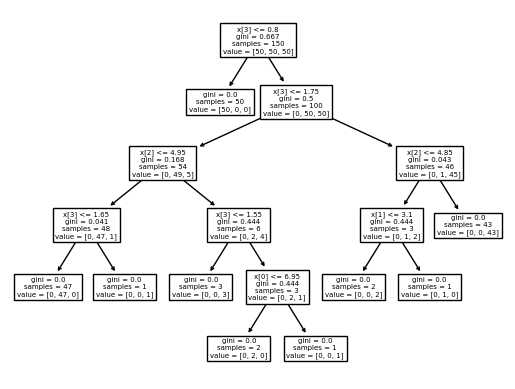

In [5]:
# 결정 트리 시각화(plot_tree)
tree.plot_tree(clf)

#이 함수는 Matplotlib을 사용하여 결정 트리의 구조와 각 노드에서의 결정 경계를 그래픽으로 표시합니다.

# 위 결정트리 부가 설명

이 결정 트리 다이어그램은 Iris 데이터셋을 사용하여 만든 의사 결정 트리 모델의 구조를 보여줍니다. 이 다이어그램을 자세히 설명하겠습니다.



---


- 의사 결정 트리 다이어그램의 구성 요소
1. 노드(Node)
  - 트리의 각 상자는 하나의 노드를 나타냅니다. 노드는 데이터셋을 특정 기준에 따라 분할합니다. 루트 노드는 트리의 최상단에 위치합니다.

2. 특성(feature) 및 임곗값(threshold)
  - 각 노드의 상단에는 데이터의 특정 특성과 그 특성에 대한 임곗값이 있습니다. 예를 들어, x[3] <= 0.8는 특성 3(꽃잎의 폭)이 0.8 이하인지를 기준으로 데이터를 분할한다는 의미입니다.

3. Gini 계수(gini)
  - Gini 계수는 노드의 불순도를 측정합니다. 값이 0에 가까울수록 해당 노드는 더 "순수"합니다(즉, 하나의 클래스만 포함).


4. 샘플(samples)
  - 노드에 포함된 데이터 포인트(샘플)의 수를 나타냅니다. 예를 들어, samples = 150은 해당 노드에 150개의 데이터 포인트가 있다는 것을 의미합니다.

5. 값(value)
  - 노드 내에 있는 각 클래스에 대한 샘플 수를 보여줍니다. 예를 들어, value = [50, 50, 50]는 세 클래스가 각각 50개씩 있다는 것을 의미합니다.

6. 클래스 예측
  - 리프 노드(더 이상 분할되지 않는 노드)에서는 이 노드에서 예측하는 클래스를 결정합니다. 가장 많은 샘플을 포함하는 클래스가 예측 클래스입니다.



---


- 다이어그램의 흐름

1. 루트 노드
  - 트리의 맨 위에 있는 노드로, 모든 샘플(150개)이 포함되어 있으며 Gini 계수는 0.667입니다. x[3] <= 0.8라는 조건으로 트리를 두 개의 하위 노드로 분할합니다.

2. 왼쪽 자식 노드
  - x[3] <= 0.8 조건을 만족하는 샘플(50개)이 있으며, Gini 계수는 0.0입니다. 이 노드는 더 이상 분할되지 않고, 첫 번째 클래스(꽃의 종류 1)를 예측합니다.

3. 오른쪽 자식 노드
  - x[3] > 0.8 조건을 만족하는 샘플(100개)이 있으며, 두 개의 하위 노드로 다시 분할됩니다.

4. 하위 노드(왼쪽)
  - x[3] <= 1.75 조건을 사용하여 분할되며, Gini 계수가 0.5로 나타나 있습니다. 이 하위 노드는 x[2] <= 4.95라는 조건을 통해 추가적인 자식 노드로 분할됩니다.
  - x[3] <= 1.65에서 다시 분할하여 샘플 47개 중 47개가 두 번째 클래스에 속하는 것을 보여주고 있습니다.

5. 하위 노드(오른쪽)
  - x[2] > 4.95 조건을 가진 샘플 43개가 세 번째 클래스(꽃의 종류 3)에 속합니다.


---


**결론**

이 결정 트리는 특성을 기반으로 데이터셋을 분할하여 각 데이터 포인트를 특정 클래스에 할당하는 방법을 시각적으로 보여줍니다. 각 분할은 Gini 계수를 사용하여 결정되며, 최종 리프 노드에서는 최종 클래스가 예측됩니다.

In [6]:
# 그래프 예쁘게 나타내주는 툴
pip install graphviz

In [7]:
# [결정트리 예제 (2)]
#graphviz 모듈을 임포트합니다.
#graphviz는 그래프나 트리와 같은 구조를 시각화하는 데 사용되는 라이브러리입니다.
import graphviz

#tree.export_graphviz 함수를 사용하여 clf라는 결정 트리 모델을 Graphviz의 DOT 형식으로 변환합니다.
#out_file=None은 파일에 쓰지 않고 문자열로 반환하겠다는 의미입니다.
dot_data = tree.export_graphviz(clf, out_file=None)

#DOT 형식의 데이터를 사용하여 graphviz.Source 객체를 생성합니다.
#이 객체는 나중에 그래프를 렌더링하는 데 사용됩니다.
graph = graphviz.Source(dot_data)

#graph.render("iris")는 생성된 그래프를 'iris'라는 이름의 파일로 렌더링하고 저장합니다.
#기본적으로 PDF 형식으로 저장됩니다.
graph.render("iris")

'iris.pdf'

In [8]:
iris = load_iris()
'''
load_iris() 함수를 호출하여 사이킷런에 내장된 Iris 데이터셋을 로드합니다.
이 데이터셋은 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비라는
네 가지 특징을 가지고 있으며 세 종류의 붓꽃 종(Species)으로 구성되어 있습니다.
'''

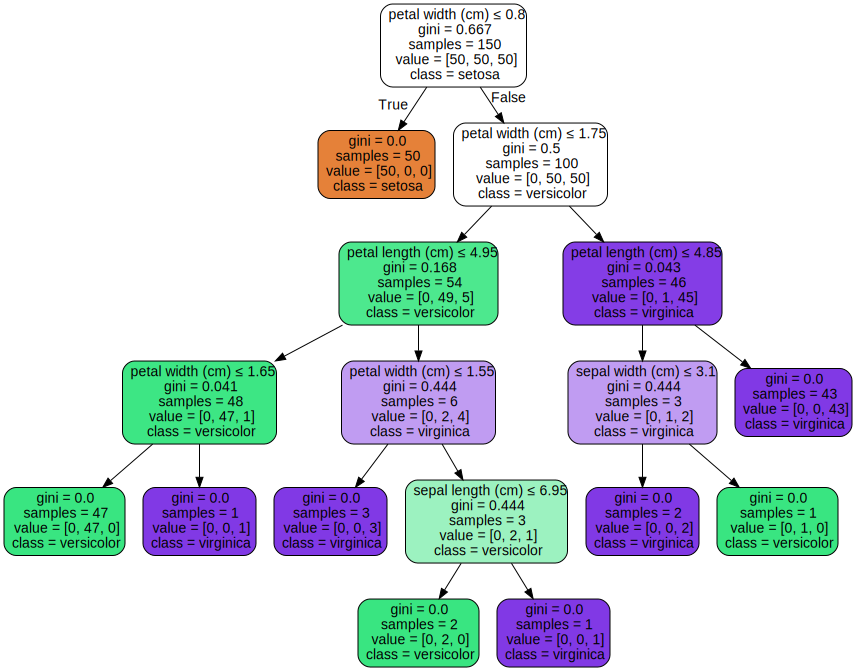

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
'''
결정 트리 모델 clf를 다시 DOT 형식으로 변환합니다.
이번에는 시각화에 사용할 몇 가지 옵션이 추가되었습니다:

feature_names=iris.feature_names: 각 노드에서 사용할 특징의 이름을 지정합니다.
class_names=iris.target_names: 클래스의 이름을 지정하여 리프 노드에서 표시될 이름을 설정합니다.
filled=True: 노드를 클래스에 따라 색칠하여 가독성을 높입니다.
rounded=True: 노드의 모서리를 둥글게 하여 시각적으로 보기 좋게 만듭니다.
special_characters=True: 특수 문자가 포함될 수 있도록 허용합니다.

'''
#위에서 생성한 DOT 데이터를 사용하여 새로운 graphviz.Source 객체를 생성합니다.
#이 객체는 앞에서 설정한 다양한 옵션을 포함하여 트리를 시각화할 준비가 됩니다.
graph = graphviz.Source(dot_data)
graph

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#sklearn.tree 모듈에서 export_text 함수를 임포트합니다.
#이 함수는 학습된 결정 트리의 구조를 텍스트 형식으로 변환하여 사람이 읽을 수 있게 합니다.
from sklearn.tree import export_text

#load_iris() 함수를 호출하여 Iris 데이터셋을 로드합니다.
#데이터셋은 150개의 샘플로 구성되어 있으며, 각 샘플은 4개의 특징과 1개의 클래스 레이블(붓꽃의 종류)로 이루어져 있습니다.
iris = load_iris()

#DecisionTreeClassifier 객체를 생성하여 변수 decision_tree에 할당합니다.
#random_state=0은 결과의 재현성을 보장하기 위해 난수 생성기의 시드를 설정합니다.
#max_depth=2는 트리의 최대 깊이를 2로 제한하여 과적합을 방지합니다.
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)

#fit 메서드를 호출하여 결정 트리 모델을 학습시킵니다.
#iris.data는 모델의 입력(feature) 데이터이고,  iris.target은 각 입력에 대응하는 정답(label) 데이터입니다.
#학습된 모델은 decision_tree에 저장됩니다.
decision_tree = decision_tree.fit(iris.data, iris.target)

#export_text 함수를 사용하여 학습된 결정 트리를 텍스트 형식으로 변환합니다.
#feature_names=iris['feature_names']는 트리의 노드에 특징의 이름을 포함시켜 해석을 돕습니다.
#결과 텍스트는 변수 r에 저장됩니다.
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

'''
[출력설명]
출력된 텍스트는 결정 트리의 각 노드와 그 분기 기준을 텍스트로 나타냅니다.

|--- petal width (cm) <= 0.80는 트리의 첫 번째 노드에서 '꽃잎 너비'가 0.80cm 이하인지 확인하는 조건을 나타냅니다.
| |--- class: 0는 위 조건을 만족할 경우 샘플을 클래스 0(즉, Setosa)로 분류합니다.
|--- petal width (cm) > 0.80는 위 조건을 만족하지 않을 경우 다음 노드로 이동하여 새로운 조건을 확인합니다.
트리의 깊이가 max_depth=2로 제한되어 있기 때문에 최대 두 번의 조건 확인 후에 리프 노드(결정된 클래스)에 도달합니다.

'''

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# 사이킷런의DecisionTreeRegressor
 ▪데이터세트에서회귀분석을수행하는결정트리알고리즘

  - decision_path(self,X[,check_input])
    - 트리에서의결정깊이반환
  - fit(self,X,y[,sample_weight,…])
    - 훈련데이터세트(X, y)에대한결정트리분류기학습수행
  - get_depth(self)
    - 결정트리의깊이반환
  - get_n_leaves(self)
    - 결정트리의노드수반환
  - predict(self,X[,check_input])
    - X에대한분류나회귀예측
  - score(self,X,y[,sample_weight])
    - 주어진테스트데이터와레이블(실제값)에대한평균정확도반환

In [11]:
#[결정트리 회귀 예제]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [12]:
weather_data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [14]:
features = weather_data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                         'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]
target = weather_data['Apparent Temperature (C)']

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(features_train.shape, features_test.shape)

(77162, 7) (19291, 7)


In [16]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(features_train, target_train)
print(reg.score(features_test, target_test))

0.9646275474503792


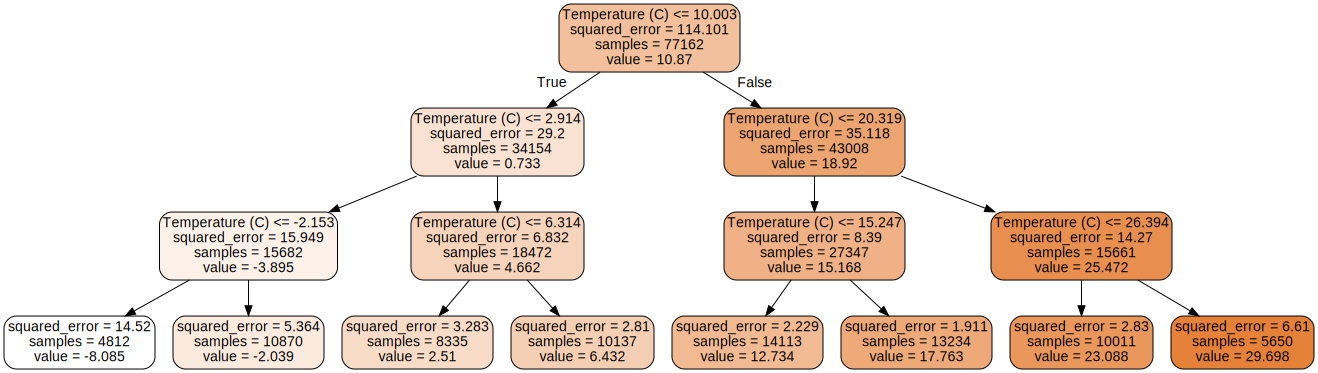

In [17]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(reg, out_file=None,
                               feature_names=['Temperature (C)', 'Humidity',
                                              'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                                              'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [18]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(features_train, target_train)
print(reg.score(features_test, target_test))

0.9646275474503793


In [ ]:
new_data = [20,50,10,180,10,0,1010]


In [29]:
# [결정트리 예제 : 와인 데이터] -> 레드 와인? 화이트 와인?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [30]:
wine_data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/winequalityN.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [31]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
data = wine_data[['alcohol', 'residual sugar', 'pH']]
target = wine_data['type']

In [34]:
data.fillna(data.mean(), inplace=True)

<ipython-input-34-a20208f658ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)


In [35]:
data

,alcohol,residual sugar,pH
0,8.8,20.7,3.00
1,9.5,1.6,3.30
2,10.1,6.9,3.26
3,9.9,8.5,3.19
4,9.9,8.5,3.19
...,...,...,...
6492,10.5,2.0,3.45
6493,11.2,2.2,3.52
6494,11.0,2.3,3.42
6495,10.2,2.0,3.57


In [36]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [37]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [38]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.classes_)
print(dt.feature_importances_)
#0:'alcohol', 1:'residual sugar', 2:'pH'

0.996728882047335
0.8792307692307693
['red' 'white']
[0.23015806 0.51794871 0.25189323]


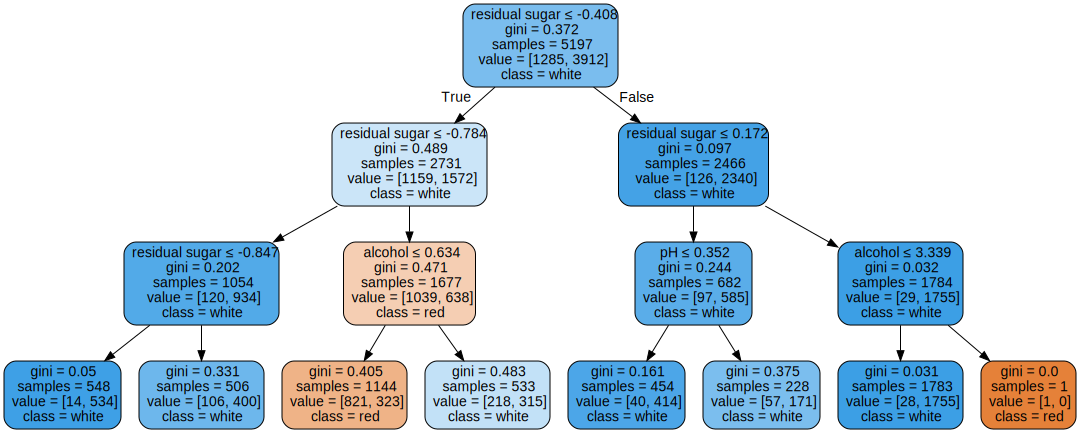

In [39]:
from sklearn import tree
import graphviz
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dot_data = tree.export_graphviz(dt.fit(train_scaled, train_target), out_file=None,
                               feature_names=data.columns,
                               class_names = dt.classes_,
                               filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [40]:
new_Data=[15,10,3] #'alcohol' : 15, 'residual sugar' : 10, 'pH' : 3
pred=dt.predict([new_Data])
if(pred[0]=='red'):
  print("This is red wine")
else:
  print("This is white wine")

This is red wine


In [42]:
# [결정트리 예제 : 자동차 데이터]
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/Car_Purchasing_Data.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB
None


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [43]:
import matplotlib.pyplot as plt
x = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
x = data[list(x)]
y = data['Car Purchase Amount']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test)) #회귀분석은 데이터양이 적어서 정확도가 많이 떨어진다.

0.6233804735945401


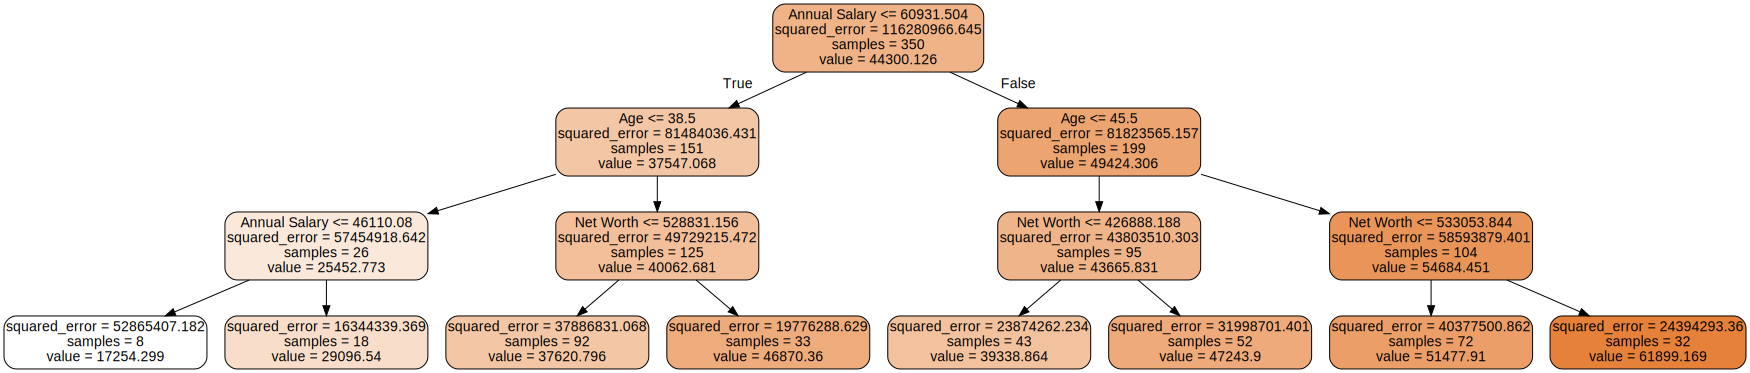

In [47]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(regr, out_file=None,
                               feature_names=['Gender','Age','Annual Salary','Credit Card Debt','Net Worth'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [48]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.6233804735945401


In [49]:
#예측
new_data = [1,30,59729, 9572, 764531] #Gender, Age, Annual Salary, Credit Card Debt, Net Worth
pred = regr.predict([new_data])
price = pred[0].astype(int) #소수점을 빼고 정수로 만듬.
price = price*1100
print("차량구매시 낼 수 있는 금액:{0}원".format(price))

차량구매시 낼 수 있는 금액:32005600원


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
